<center><h1>Ejemplo Transformada Z</h1></center>

Ecuación de diferencias a analizar:

 $$ y(n) = x(n) - x(n-1) + x(n-2) + x(n-3) + 0.5.y(n-1) + 0.25.y(n-1)   $$
 
Transformada Z y Cálculo de H(Z):

 $$ Y(z) = X(z) - z^{-1}.X(z) + z^{-2}.X(z) + z^{-3}.X(z) + 0.5.z^{-1}.Y(z) + 0.25.z^{-2}.Y(z) $$
 
 $$ Y(z).(1 - 0.5.z^{-1} - 0.25.z^{-2}) = X(z).(1 - z^{-1} + z^{-2} + z^{-3}) $$
 
 $$ \frac{Y(z)}{X(z)} = H(z) =\frac{1 - z^{-1} + z^{-2} + z^{-3}}{1 - 0.5.z^{-1} - 0.25.z^{-2}} $$
 
La ecuación de diferencias representa un **sistema IIR**, ya que la salida depende no solamente de la entrada, sino también de muestras pasadas de la salida.

In [2]:
import numpy as np

b = [1, -1, 1, 1]    
a = [1, -0.5, -0.25]

# polos y ceros
p = np.roots(a)
z = np.roots(b)

print("Los polos están ubicados en {}".format(p))
print("Los zeros están ubicados en {}".format(z))


Los polos están ubicados en [ 0.80901699 -0.30901699]
Los zeros están ubicado en [ 0.77184451+1.11514251j  0.77184451-1.11514251j -0.54368901+0.j        ]


### Diagrama de Polos y Ceros

Los polos del sistema se ubican en el interior del círculo unitario, por lo tanto el sistema es **estable**.

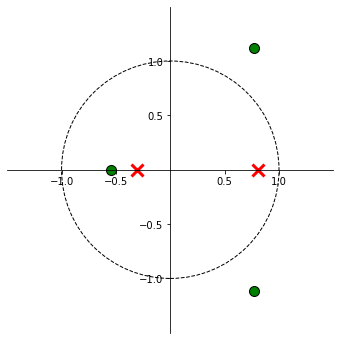

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

def zplane(b, a, filename=None):
    """
    Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

fig = plt.figure(figsize=(10,6))
z, p, k =zplane(b,a)

### Respuesta en frecuencia

Se grafica la magnitud y la fase de la respuesta en frecuencia, utilizando la función `freqz` de Numpy, la cual evalúa la función de transferencia en el circulo unitario $ e^{jw} $.

Cantidad de puntos calculados: 8192


(-0.1570604579196411, 3.298269616312463, 0.5608967929931965, 8.354243009857466)

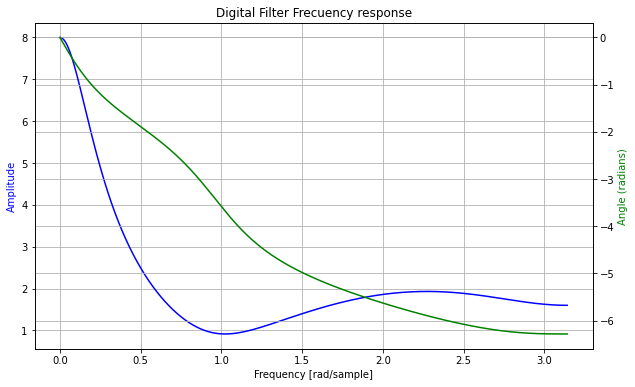

In [6]:
from scipy import signal

w, h = signal.freqz(b,a,worN=8192)
print("Cantidad de puntos calculados: {}".format(np.size(w)))

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
ax2.grid()
ax1.axis('tight')